In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# Reflect the database tables into Python classes
Base = automap_base()
Base.prepare(engine, reflect=True)

# Assign the classes to variables
Measurement = Base.classes.measurement
Station = Base.classes.station


In [37]:
# Creating our session (link) from Python to the DB
session = Session(engine)


In [38]:
# View all of the classes that Automap found
all_classes = Base.classes.keys()
print(all_classes)


['measurement', 'station']


# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the Measurement table
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"The most recent date is {most_recent_date}")


The most recent date is 2017-08-23


In [42]:
# Load the results into a Pandas DataFrame
#precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

In [76]:
precipitation_df.sort_index(ascending=True, inplace=True)
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])


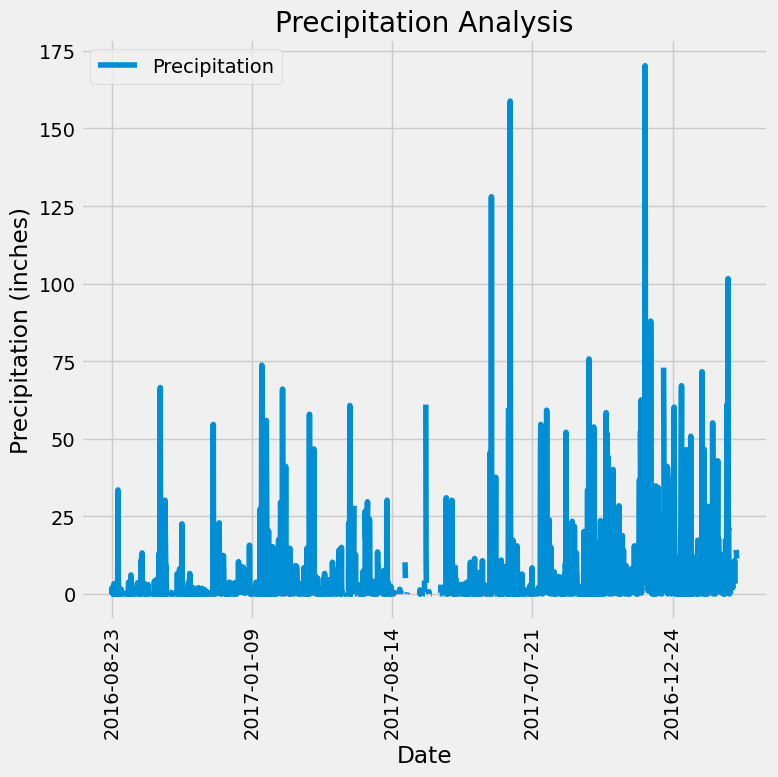

       Precipitation
count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000


In [77]:
# Plot precipitation data
precipitation_df.plot(x='Date', y='Precipitation', title='Precipitation Analysis', figsize=(8, 8))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate summary statistics
precipitation_stats = precipitation_df.describe()
print(precipitation_stats)


# Exploratory Station Analysis

In [78]:
# Calculate the total number of stations
station_count = session.query(func.count(Station.station)).scalar()
print(f'The total number of stations is {station_count}')


The total number of stations is 9


In [79]:
# Query to find the most active station
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

most_active_station_id, most_active_station_observations = most_active_station
print(f'The most active station is {most_active_station_id} with {most_active_station_observations} observations.')


The most active station is USC00519281 with 2772 observations.


In [80]:
from sqlalchemy import func

# Query to get the station names and their observation counts
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the results
for station, count in station_counts:
    print(f"Station: {station}, Observation Count: {count}")


Station: USC00519281, Observation Count: 2772
Station: USC00519397, Observation Count: 2724
Station: USC00513117, Observation Count: 2709
Station: USC00519523, Observation Count: 2669
Station: USC00516128, Observation Count: 2612
Station: USC00514830, Observation Count: 2202
Station: USC00511918, Observation Count: 1979
Station: USC00517948, Observation Count: 1372
Station: USC00518838, Observation Count: 511


In [82]:
from sqlalchemy import func

# Query to calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()

# Unpack the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

# Print the results
print(f"For the most active station {most_active_station_id}:")
print(f"Lowest Temperature: {lowest_temp}°F")
print(f"Highest Temperature: {highest_temp}°F")
print(f"Average Temperature: {avg_temp}°F")


For the most active station USC00519281:
Lowest Temperature: 12.2°F
Highest Temperature: 29.4°F
Average Temperature: 22.03582251082252°F


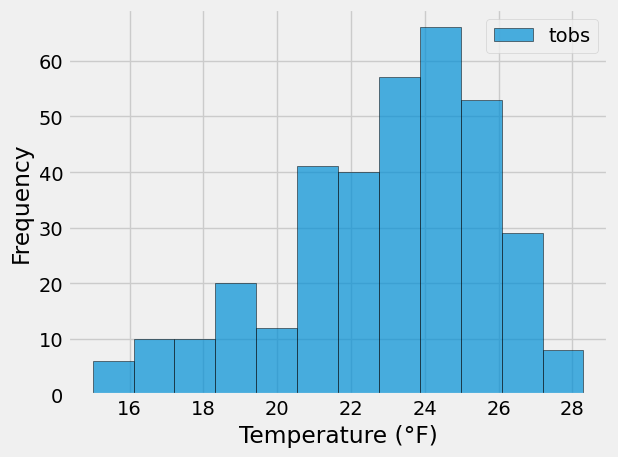

In [83]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Calculate the date 12 months ago from the most recent date
one_year_ago = (pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')

# Query temperature observations for the most active station over the past 12 months
temperature_data_12_months = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).all()

# Load the results into a Pandas DataFrame
temperature_12_months_df = pd.DataFrame(temperature_data_12_months, columns=['Date', 'Temperature'])

# Plot temperature data as a histogram
plt.hist(temperature_12_months_df['Temperature'], bins=12, label='tobs', alpha=0.7, edgecolor='k')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Close Session

In [84]:
# Close Session
session.close()